Πρώτες 5 γραμμές:
        age       sex       bmi        bp  ...        s4        s5        s6  target
0  0.038076  0.050680  0.061696  0.021872  ... -0.002592  0.019907 -0.017646   151.0
1 -0.001882 -0.044642 -0.051474 -0.026328  ... -0.039493 -0.068332 -0.092204    75.0
2  0.085299  0.050680  0.044451 -0.005670  ... -0.002592  0.002861 -0.025930   141.0
3 -0.089063 -0.044642 -0.011595 -0.036656  ...  0.034309  0.022688 -0.009362   206.0
4  0.005383 -0.044642 -0.036385  0.021872  ... -0.002592 -0.031988 -0.046641   135.0

[5 rows x 11 columns]

Τελευταίες 5 γραμμές:
          age       sex       bmi  ...        s5        s6  target
437  0.041708  0.050680  0.019662  ...  0.031193  0.007207   178.0
438 -0.005515  0.050680 -0.015906  ... -0.018114  0.044485   104.0
439  0.041708  0.050680 -0.015906  ... -0.046883  0.015491   132.0
440 -0.045472 -0.044642  0.039062  ...  0.044529 -0.025930   220.0
441 -0.045472 -0.044642 -0.073030  ... -0.004222  0.003064    57.0

[5 rows x 11 columns]
[

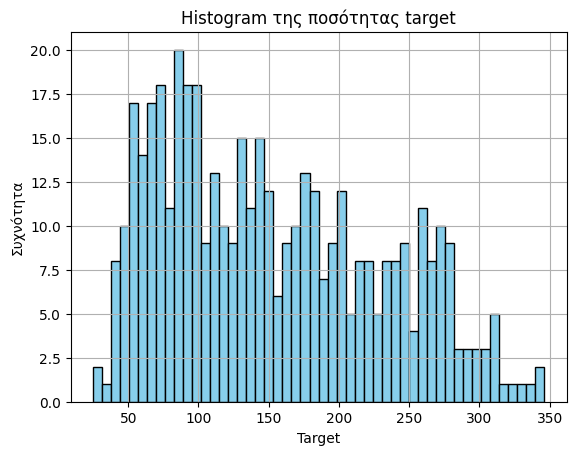

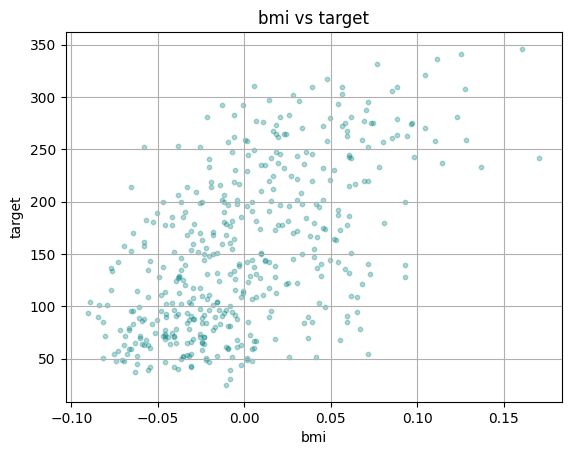


Αποτελέσματα Μοντέλων:
Linear Regression: MAE=42.79, RMSE=53.85, R2=0.4526
Decision Tree: MAE=54.53, RMSE=70.55, R2=0.0607
Random Forest: MAE=44.05, RMSE=54.33, R2=0.4428
Gradient Boosting: MAE=44.60, RMSE=53.84, R2=0.4529

Sample Predictions (Πρώτα 5 entries):
Sample 0: Actual = 219.0, Weighted Avg = 160.4, Simple Avg = 162.7
Sample 1: Actual = 70.0, Weighted Avg = 163.3, Simple Avg = 160.2
Sample 2: Actual = 202.0, Weighted Avg = 155.4, Simple Avg = 156.3
Sample 3: Actual = 230.0, Weighted Avg = 275.0, Simple Avg = 274.5
Sample 4: Actual = 111.0, Weighted Avg = 132.7, Simple Avg = 135.1

Αποτελέσματα Συνδυαστικών Μοντέλων:
Average: MAE=43.85, RMSE=53.30, R2=0.4638
WeightedAverage: MAE=43.65, RMSE=52.96, R2=0.4705
Stacking: MAE=44.03, RMSE=53.58, R2=0.4582


In [65]:
# Φορτώνουμε τις απαραίτητες βιβλιοθήκες
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_diabetes

import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression

diabetes = load_diabetes()
# df["target"] = diabetes.target

diabetes_df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)

# Load the dataset
diabetes_bunch = load_diabetes() # Renamed to avoid confusion with the DataFrame

# Create a pandas DataFrame from the features
diabetes_df = pd.DataFrame(data=diabetes_bunch.data, columns=diabetes_bunch.feature_names)

# Now add the target variable to the created diabetes_df
diabetes_df["target"] = diabetes_bunch.target
#-----------------------------ΑΣΚΗΣΗ 1-----------------------------------------

print("Πρώτες 5 γραμμές:")
print(diabetes_df.head())
print("\nΤελευταίες 5 γραμμές:")
print(diabetes_df.tail())
print(list(diabetes_df.columns))

#-----------------------------ΑΣΚΗΣΗ 2-----------------------------------------

print("\nΕγγραφές όπου το bmi > 0.5:")
print(diabetes_df[diabetes_df["bmi"] > 0.05])

print ("\nΤιμές των age και target για τις 3 τελευταίες εγγραφές:")
print(diabetes_df[["age", "target"]][-3:])

#-----------------------------ΑΣΚΗΣΗ 3-----------------------------------------

diabetes_df['age_group'] = ['Young' if age < 0 else 'Old' for age in diabetes_df['age']]
print ("\nΗ στήλη age_group:")
print(diabetes_df['age_group'])

#-----------------------------ΑΣΚΗΣΗ 4-----------------------------------------

# Histogram target
plt.hist(diabetes_df["target"], bins=50, color='skyblue', edgecolor='black')
plt.title("Histogram της ποσότητας target")
plt.xlabel("Target")
plt.ylabel("Συχνότητα")
plt.grid(True)
plt.show()

# Scatter plot: bmi vs target
plt.scatter(diabetes_df["bmi"], diabetes_df["target"], alpha=0.3, c='teal', s=10)
plt.title("bmi vs target")
plt.xlabel("bmi")
plt.ylabel("target")
plt.grid(True)
plt.show()

#-----------------------------ΑΣΚΗΣΗ 5-----------------------------------------

# Φόρτωση δεδομένων
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
diabetes_df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
diabetes_df["target"] = diabetes.target

# Προετοιμασία δεδομένων
X = diabetes_df.drop(columns=["target"])
# Μετατροπή κατηγορικών σε dummy variables
X = pd.get_dummies(X, drop_first=True)
y = diabetes_df["target"]

# Διαχωρισμός σε train και test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ορισμός μοντέλων
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)
}

# Εκπαίδευση και πρόβλεψη
results = {}
predictions = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    predictions[name] = preds
    results[name] = {
        "MAE": mean_absolute_error(y_test, preds),
        "RMSE": np.sqrt(mean_squared_error(y_test, preds)),
        "R2": r2_score(y_test, preds)
    }


# Εκτύπωση αποτελεσμάτων
print("\nΑποτελέσματα Μοντέλων:")
for name, metrics in results.items():
    print(f"{name}: MAE={metrics['MAE']:.2f}, RMSE={metrics['RMSE']:.2f}, R2={metrics['R2']:.4f}")

#-----------------------------ΑΣΚΗΣΗ 6, 7-----------------------------------------

# Weighted Averaging - Βάρη από αντίστροφα του MAE
total_inv_mae = sum(1 / results[name]["MAE"] for name in models.keys())
weights = {name: (1 / results[name]["MAE"]) / total_inv_mae for name in models.keys()}

# Δημιουργία weighted average πρόβλεψης
weighted_avg_preds = sum(weights[name] * predictions[name] for name in models.keys())

# Απλός μέσος όρος
avg_preds = np.mean(list(predictions.values()), axis=0)

print("\nSample Predictions (Πρώτα 5 entries):")
for i in range(5):
    print(
        f"Sample {i}: Actual = {y_test.iloc[i]:.1f}, "
        f"Weighted Avg = {weighted_avg_preds[i]:.1f}, "
        f"Simple Avg = {avg_preds[i]:.1f}"
    )

# Stacking Regressor με linear regression ως meta-model

models = {
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)
}

estimators = [(name, model) for name, model in models.items()]
stacking_regressor = StackingRegressor(estimators=estimators, final_estimator=LinearRegression())
stacking_regressor.fit(X_train, y_train)
stacking_preds = stacking_regressor.predict(X_test)

# Υπολογισμός μετρικών για νέα μοντέλα
ensemble_results = {
    "Average": {
        "MAE": mean_absolute_error(y_test, avg_preds),
        "RMSE": np.sqrt(mean_squared_error(y_test, avg_preds)),
        "R2": r2_score(y_test, avg_preds),
    },
    "WeightedAverage": {
        "MAE": mean_absolute_error(y_test, weighted_avg_preds),
        "RMSE": np.sqrt(mean_squared_error(y_test, weighted_avg_preds)),
        "R2": r2_score(y_test, weighted_avg_preds),
    },
    "Stacking": {
        "MAE": mean_absolute_error(y_test, stacking_preds),
        "RMSE": np.sqrt(mean_squared_error(y_test, stacking_preds)),
        "R2": r2_score(y_test, stacking_preds),
    }
}

print("\nΑποτελέσματα Συνδυαστικών Μοντέλων:")
for name, metrics in ensemble_results.items():
    print(f"{name}: MAE={metrics['MAE']:.2f}, RMSE={metrics['RMSE']:.2f}, R2={metrics['R2']:.4f}")